In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Overlook of the Dataset

In [2]:
df_data_21 = pd.read_csv('world-happiness-report-2021.csv')
df_data_21

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [3]:
df_data_past = pd.read_csv('world-happiness-report.csv')
df_data_past

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [4]:
## List of Hong Kong's neightbor countries/provinces (East Asia)
east_asia = df_data_21[df_data_21['Regional indicator'] == "East Asia"]['Country name'].to_list()

In [6]:
## Dataset of Hong Kong's neightbor countries/provinces (East Asia)
df_east_asia = pd.DataFrame(df_data_21[df_data_21['Country name'].isin(east_asia)])

## Happiness Index  
Comparing the Ladder score (Happiness Index) of some significant countries, the East Asian Country and Hong Kong with their means and median

In [9]:
# The country in the world that has the highest ladder score: Finland
data_21_top = df_data_21.iloc[0:1]
# The country in the world that has the lowest ladder score: Afghanistan 
data_21_bottom = (df_data_21.iloc[-1])
# The country (province) in East Asia that has the highest ladder score: Taiwan 
east_asia_top = df_east_asia.iloc[0:1]
# The country (province) in East Asia that has the lowest ladder score: China
east_asia_bottom = (df_east_asia.iloc[-1])
# Hong Kong
east_asia_HK = (df_east_asia.iloc[-2])

In [10]:
# Means 
data_21_mean_score = float(round(df_data_21['Ladder score'].mean(),2))
east_asia_mean_score = float(round(df_east_asia['Ladder score'].mean(),2))

e_a_meanVStop = abs(east_asia_mean_score - float(round(east_asia_top['Ladder score'].mean(),2)))
e_a_meanVSbottom = abs(east_asia_mean_score - float(round(east_asia_bottom['Ladder score'].mean(),2)))
e_a_meanVSHK = abs(east_asia_mean_score - float(round(east_asia_HK['Ladder score'].mean(),2)))

data_21_meanVStop = abs(data_21_mean_score - float(round(data_21_top['Ladder score'].mean(),2)))
data_21_meanVSbottom = abs(data_21_mean_score - float(round(data_21_bottom['Ladder score'].mean(),2)))


### Summary

The mean of ladder score of the world: 5.53 and the mean of the East Asia Country: 5.81

Hong Kong has a 5.48/10 ladder score, which comes in the 77th place in the world and 5th place among the 6 East-Asian Country. The difference between the mean and its ladder score (East Asia only) is: 0.33

The country in the world that has the highest ladder score (index): Finland. The difference between the mean and its ladder score is: 2.31.

The country in the world that has the lowest ladder score (index): Afghanistan. The difference between the mean and its ladder score is: 3.01.

The country in the East Asia that has the highest ladder score (index): Taiwan Province of China. The difference between the mean and its ladder score (East Asia only) is: 0.77.

The country in the East Asia that has the lowest ladder score (index): China. The difference between the mean and its ladder score (East Asia only) is: 0.47



In [21]:
fig = px.box(data_frame=df_east_asia,
            x='Ladder score',orientation='h',width=800,height=300,
            labels={'Ladder score': 'Happiness Score'})
fig.update_layout(
    title_text='Box Plot of Ladder Score (East Asian Countries)',
    title_font_size=24)
fig.show()
mean_lad=df_east_asia['Ladder score'].mean()
median_lad=df_east_asia['Ladder score'].median()
print('mean=',mean_lad)
print('median=',median_lad)

mean= 5.810333333333333
median= 5.761


In [26]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =mpl.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

th = [0, 0.2, 0.5, 0.8, 1]
cdict = NonLinCdict(th, colors_blue )
cdiv = NonLinCdict(th, colors_div)

cm = LinearSegmentedColormap('blue', cdict)
cm_div = LinearSegmentedColormap('div',cdiv)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.titlecolor'] = colors_dark[0]
mpl.rcParams['axes.labelcolor'] = colors_dark[0]

# tick
mpl.rcParams['xtick.color'] = colors_dark[0]
mpl.rcParams['ytick.color'] = colors_dark[0]
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


# legend 
mpl.rcParams['legend.edgecolor'] = "#1F1F1F"

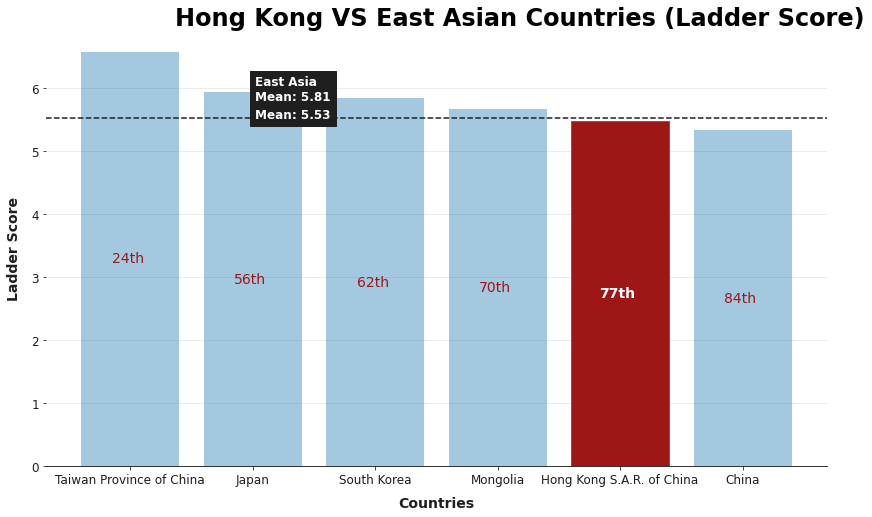

In [27]:
# Pick the index we need for East Asia countries -- +1 because original index starts from 0
east_asia_idx = list(df_east_asia.index + 1)
 
# Graph setup -- mathplotlib
fig, ax = plt.subplots(figsize=(14, 8)) # Create a frame of the graphs

ax.grid(axis='y', alpha=0.3) # Create grid 
ax.set_axisbelow(True)

ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold')
ax.set_ylabel("Ladder Score", fontsize=14, labelpad=10, fontweight='bold')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


# Line for Global Mean 
data_21_mean_line = ax.text(
                                s="Global\nMean: {:.2f}".format(data_21_mean_score),
                                x=xmax*1.02,
                                y=data_21_mean_score,
                                backgroundcolor= '#1F1F1F',
                                fontsize=12,
                                fontweight='bold',
                                color='white'
)

# Line for Mean - East Asian Countries 
east_asian_mean_line = ax.text(
                                s="East Asia\nMean: {:.2f}".format(east_asia_mean_score),
                                x=xmax*1.02,
                                y=east_asia_mean_score,
                                backgroundcolor= '#1F1F1F',
                                fontsize=12,
                                fontweight='bold',
                                color='white'
)

# East Asian Countries Ladder Score Bar
bars1 = ax.bar(df_east_asia['Country name'], df_east_asia['Ladder score'], alpha=0.4)

line  = ax.axhline(data_21_mean_score, linestyle='--', color="#1F1F1F")

# HK Ladder Score Bar
bars1[4].set_alpha(1)
bars1[4].set_color('#9E1717')
bars1[4].set_edgecolor('#636363')

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    # HK bar will be the one stand out 
    if i != 4 : 
        ax.text(
            s=f"{east_asia_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color= '#9E1717',
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{east_asia_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
    
plt.text(s="Hong Kong VS East Asian Countries (Ladder Score)", ha='right', x='Center', y=ymax*7, fontsize=24, fontweight='bold')
#plt.tight_layout()
plt.show()

